In [2]:
! pip install pandas numpy seaborn matplotlib

In [3]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for all plots
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv("data/combined_sentiment_data.csv")
df

,sentence,sentiment
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
...,...,...
3304,Online anonymity enables freedom of expression...,negative
3305,Smart cities leverage data and technology to i...,positive
3306,Biometric identification technologies offer co...,negative
3307,Data ethics guidelines are essential for ensur...,positive


In [5]:
# See first few rows (default is 5)
df.head(7)

,sentence,sentiment
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative


In [6]:
df.shape

(3309, 2)

In [7]:
# Checking dataset dimensions:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 3309
Number of columns: 2


In [8]:
# Print all column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['sentence', 'sentiment']


In [9]:
print(df[['sentence']].describe())

       sentence
count      3309
unique     3289
top      #NAME?
freq          4


In [10]:
class_dist = df['sentiment'].value_counts()
print(class_dist)

sentiment
positive    1679
negative    1630
Name: count, dtype: int64


C:\Users\carlt\AppData\Local\Temp\ipykernel_27084\2790324424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette="RdYlGn")


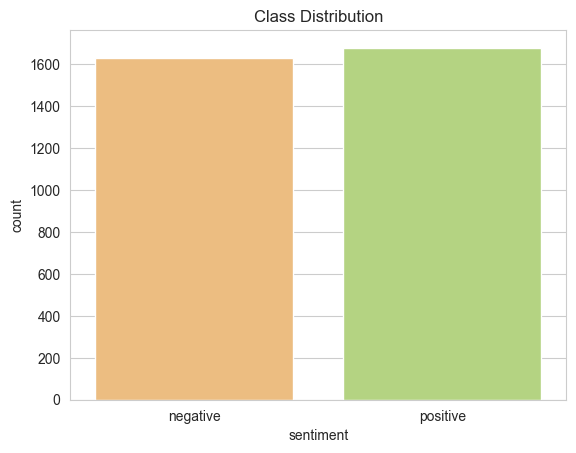

In [11]:
# Create a function to plot the class distribution
# Color negatives in red, positives in green
def plot_class_dist(df, column, title):
    sns.countplot(x=column, data=df, palette="RdYlGn")
    plt.title(title)
    plt.show()

plot_class_dist(df, 'sentiment', 'Class Distribution')

In [12]:
# Install sklearn
! pip install -U scikit-learn

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
X = df['sentence'] # Feature variable
y = df['sentiment'] # Target variable

print(X.head())
print(y.head())

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: sentence, dtype: object
0    negative
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

In [19]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8217522658610272
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.81      0.82       334
    positive       0.81      0.84      0.82       328

    accuracy                           0.82       662
   macro avg       0.82      0.82      0.82       662
weighted avg       0.82      0.82      0.82       662



In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve

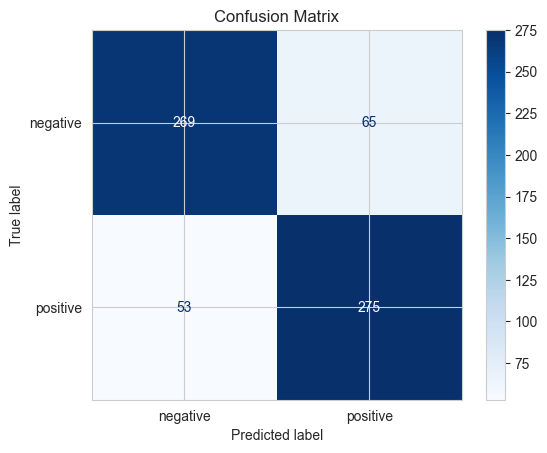

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Feature Importance (Words)
# Extract coefficients from the logistic regression model
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Top 10 positive and negative words
top_positive_indices = coefficients.argsort()[-10:][::-1]
top_negative_indices = coefficients.argsort()[:10]

top_positive_words = [(feature_names[i], coefficients[i]) for i in top_positive_indices]
top_negative_words = [(feature_names[i], coefficients[i]) for i in top_negative_indices]

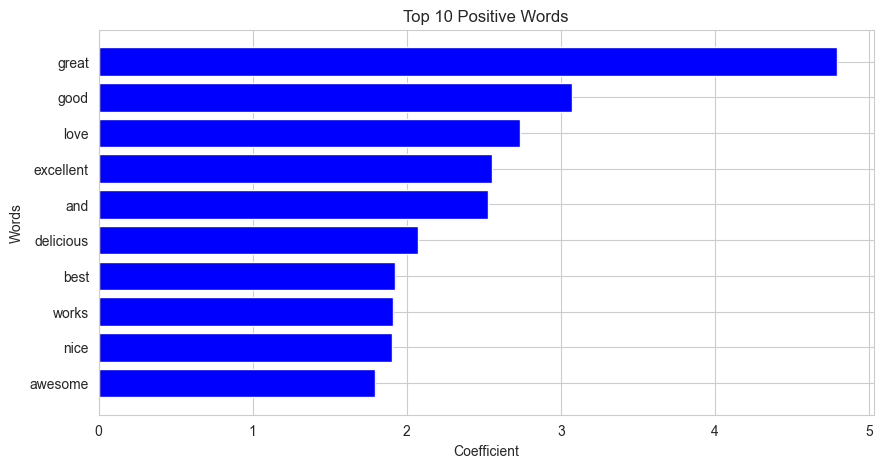

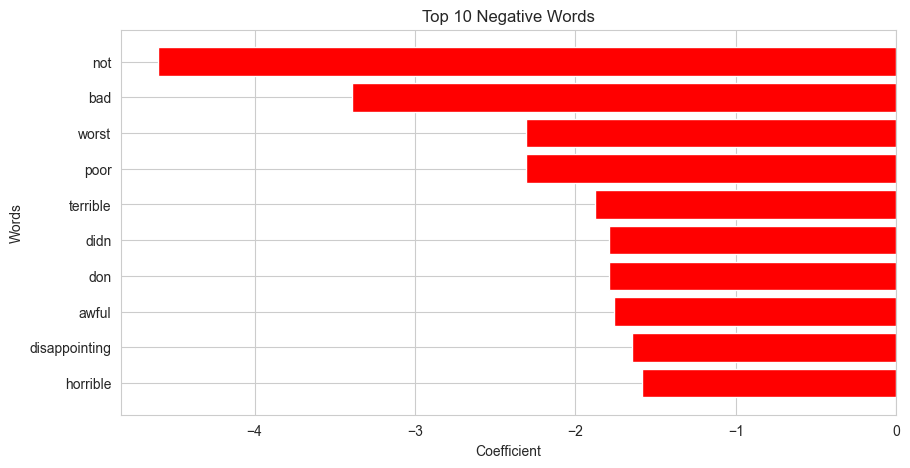

In [23]:
# Bar plot for top words
positive_words, positive_scores = zip(*top_positive_words)
negative_words, negative_scores = zip(*top_negative_words)

plt.figure(figsize=(10, 5))
plt.barh(positive_words, positive_scores, color='blue')
plt.title('Top 10 Positive Words')
plt.xlabel('Coefficient')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(negative_words, negative_scores, color='red')
plt.title('Top 10 Negative Words')
plt.xlabel('Coefficient')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 15))
X2 = vectorizer.fit_transform(df['sentence'])

In [25]:
pd.DataFrame(X2.toarray(), columns=vectorizer.get_feature_names_out()).head()


,00,10,10 10,10 10 movie,10 10 movie trilogy,10 10 scale,10 10 stars,10 feet,10 feet wide,10 feet wide net,...,zombie students humans removing,zombie students humans removing necklace,zombie students humans removing necklace containing,zombie students humans removing necklace containing piece,zombie students humans removing necklace containing piece meteorite,zombiez,zombiez hellish,zombiez hellish trinity,zombiez hellish trinity horror,zombiez hellish trinity horror films
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# K means clustering
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=600, n_init=10)
    kmeans.fit(X2)
    sum_of_squared_distances.append(kmeans.inertia_)

c:\Users\carlt\Documents\sentiment_analysis_kaggle\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\carlt\Documents\sentiment_analysis_kaggle\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\carlt\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\carlt\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 

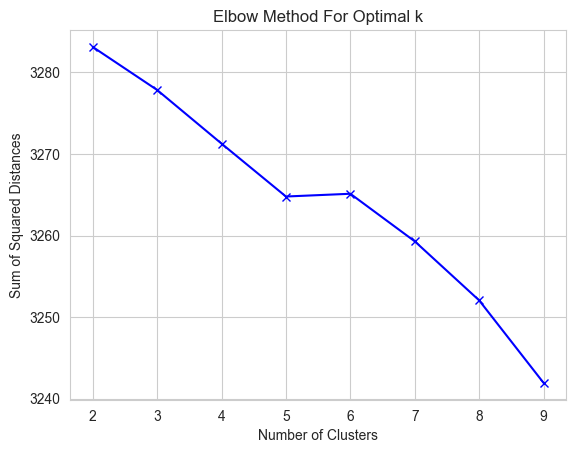

In [27]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X2)

# Get Prediction / labels
labels = model.labels_
sentiment_cl = pd.DataFrame(list(zip(df['sentence'], labels)), columns=['sentence', 'cluster'])
print(sentiment_cl.sort_values(by=['cluster']))

                                              sentence  cluster
25                Great Pocket PC / phone combination.        0
26   I've owned this phone for 7 months now and can...        0
28   People couldnt hear me talk and I had to pull ...        0
30   This is a simple little phone to use, but the ...        0
33   I have two more years left in this contract an...        0
..                                                 ...      ...
205              great headset, very impressed - H500.        4
563  If you are looking for a good quality Motorola...        4
570  My experience was terrible..... This was my fo...        4
579  Due to this happening on every call I was forc...        4
44                        Excellent bluetooth headset.        4

[3309 rows x 2 columns]


In [32]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


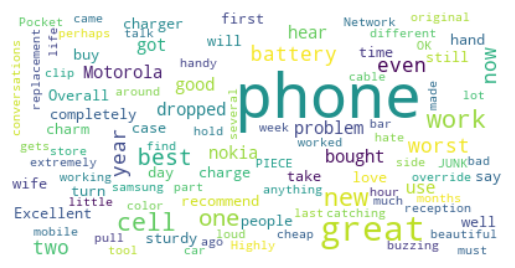

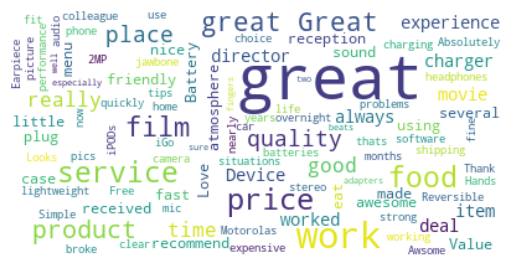

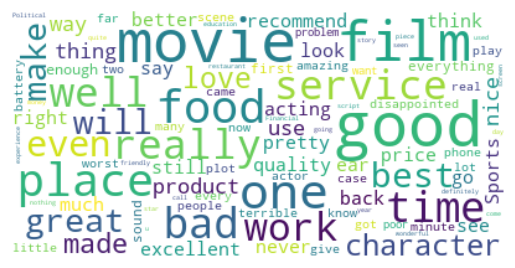

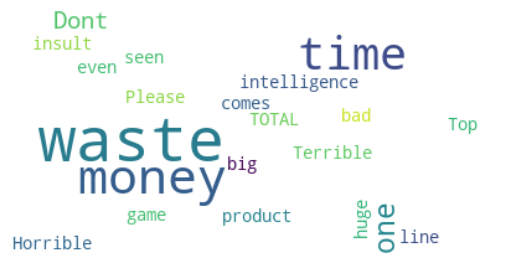

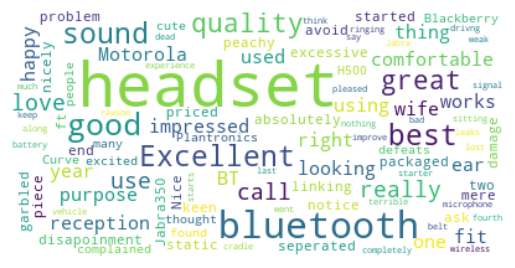

In [33]:
# Create word clouds for each cluster
# import wordclou
from wordcloud import WordCloud

for k in range(true_k):
    text = sentiment_cl[sentiment_cl['cluster'] == k]['sentence'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50,max_words=100,background_color='white').generate(text)

    plt.plot()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()